In [1]:
import pandas as pd

In [2]:
%load_ext google.colab.data_table

In [3]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
countries = tables[1]
countries.columns = ['country', '1990',	'2005',	'2017',	'percent2017', 'change',	'area', 'capita', 'totalincl', 'totalexcl']
countries = countries[3:]
countries

,country,1990,2005,2017,percent2017,change,area,capita,totalincl,totalexcl
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


**Graph 1: CO2 of the bigger countries**



In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# sort table with column mt2017, to get the top 5 producers
sorted_table = countries.sort_values(by='2017', ascending=False)
sorted_table

,country,1990,2005,2017,percent2017,change,area,capita,totalincl,totalexcl
42,China,2397.048,6263.064,10877.218,29.34%,353.8%,1133.0,7.7,9663.36,10313.46
202,United States,5085.897,5971.571,5107.393,13.77%,0.4%,519.0,15.7,4749.57,4981.30
67,European Union,4409.339,4249.995,3548.345,9.57%,-19.5%,793.0,7.0,2636.98,2871
93,India,605.968,1210.754,2454.774,6.62%,305.1%,747.0,1.8,2400.25,2434.52
158,Russia,2378.921,1733.950,1764.866,4.76%,-25.8%,103.0,12.3,1049.05,1607.55
...,...,...,...,...,...,...,...,...,...,...
68,Falkland Islands,0.013,0.016,0.038,0.00%,192.3%,3.0,13.1,NaN,NaN
106,Kiribati,0.020,0.033,0.030,0.00%,50.0%,37.0,0.3,0.08,0.08
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
160,"Saint Helena, Ascension and Tristan da Cunha",0.010,0.010,0.015,0.00%,50.0%,49.0,3.7,NaN,NaN


In [6]:
# select the required data for the plot
top_five_producers = sorted_table.iloc[:5, 0:4]
top_five_producers

,country,1990,2005,2017
42,China,2397.048,6263.064,10877.218
202,United States,5085.897,5971.571,5107.393
67,European Union,4409.339,4249.995,3548.345
93,India,605.968,1210.754,2454.774
158,Russia,2378.921,1733.950,1764.866


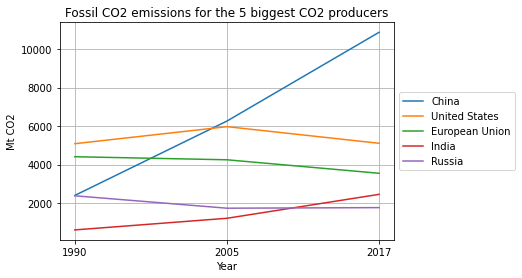

In [7]:
fig, ax = plt.subplots()

years = top_five_producers.columns[1:]

for index, row in top_five_producers.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.xlabel('Year')
plt.ylabel('Mt CO2')
plt.title('Fossil CO2 emissions for the 5 biggest CO2 producers')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()

**Graph 2: worst and best changers**

In [8]:
countries_extra_columns = countries
countries_extra_columns['baseline1990'] = countries.loc[:, '1990'] / countries.loc[:, '1990'] * 100
countries_extra_columns['relative2005'] = countries.loc[:, '2005'] / countries.loc[:, '1990'] * 100
countries_extra_columns['relative2017'] = countries.loc[:, '2017'] / countries.loc[:, '1990'] * 100
countries_extra_columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,country,1990,2005,2017,percent2017,change,area,capita,totalincl,totalexcl,baseline1990,relative2005,relative2017
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44,100.0,41.751767,448.625295
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56,100.0,63.739936,76.348170
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67,100.0,149.515051,243.508382
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34,100.0,273.030251,527.704666
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN,100.0,233.333333,466.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86,100.0,491.680706,1083.782579
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN,100.0,157.638889,191.666667
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31,100.0,316.073762,181.544940
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74,100.0,83.147208,168.087986


In [18]:
sorted_on_change_table = countries_extra_columns.sort_values(by='relative2017')
best_and_worst_changers = sorted_on_change_table.iloc[[1, 2, 3, -1, -2, -3],  [0, 10, 11, 12]]
best_and_worst_changers

,country,baseline1990,relative2005,relative2017
128,Moldova,100.0,25.468598,25.856620
199,Ukraine,100.0,45.253380,26.266646
141,North Korea,100.0,60.570167,28.754996
81,Greenland,100.0,21033.333333,17266.666667
34,Cambodia,100.0,659.950860,2594.594595
62,Equatorial Guinea,100.0,3475.257732,2545.360825


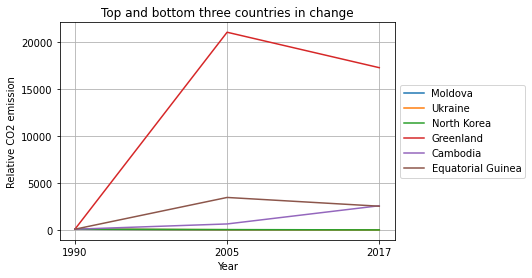

In [20]:
fig, ax = plt.subplots()

years = ['1990', '2005', '2017']

for index, row in best_and_worst_changers.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.xlabel('Year')
plt.ylabel('Relative CO2 emission')
plt.title('Top and bottom three countries in change')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()

Same graph, but countries with emission of less than 5 Mt in 1990 are removed from the table

In [13]:
# table with countries with Mt >= 5 in 1990
high_emission_countries = countries_extra_columns.loc[:, '1990'] >= 5
high_emission_table = countries_extra_columns.loc[high_emission_countries, :]
high_emission_table

,country,1990,2005,2017,percent2017,change,area,capita,totalincl,totalexcl,baseline1990,relative2005,relative2017
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56,100.0,63.739936,76.348170
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67,100.0,149.515051,243.508382
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34,100.0,273.030251,527.704666
9,Argentina,112.434,165.429,209.968,0.57%,86.7%,76.0,4.7,207.11,177.41,100.0,147.134319,186.747781
10,Armenia,20.699,4.542,4.832,0.01%,-76.7%,162.0,1.6,5.59,5.55,100.0,21.943089,23.344123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Uzbekistan,123.106,116.386,95.350,0.26%,-22.5%,213.0,3.0,108.72,112.09,100.0,94.541290,77.453577
206,Venezuela,109.268,152.464,145.877,0.39%,33.5%,159.0,4.6,181.29,138.16,100.0,139.532159,133.503862
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86,100.0,491.680706,1083.782579
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31,100.0,316.073762,181.544940


In [25]:
sorted_high_emission_table = high_emission_table.sort_values(by='relative2017')
best_and_worst_changers2 = sorted_high_emission_table.iloc[[0, 1, 2, -1, -2, -3],  [0, 10, 11, 12]]
best_and_worst_changers2

,country,baseline1990,relative2005,relative2017
10,Armenia,100.0,21.943089,23.344123
128,Moldova,100.0,25.468598,25.856620
199,Ukraine,100.0,45.253380,26.266646
207,Vietnam,100.0,491.680706,1083.782579
144,Oman,100.0,277.381353,659.887243
17,Bangladesh,100.0,280.025959,609.648111


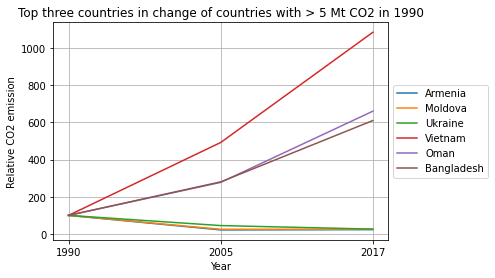

In [26]:
fig, ax = plt.subplots()

years = ['1990', '2005', '2017']

for index, row in best_and_worst_changers2.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.xlabel('Year')
plt.ylabel('Relative CO2 emission')
plt.title('Top three countries in change of countries with > 5 Mt CO2 in 1990')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()